# Relatório de Análise 8

## Removendo outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('aluguel_residencial.csv', sep=';')

<AxesSubplot:>

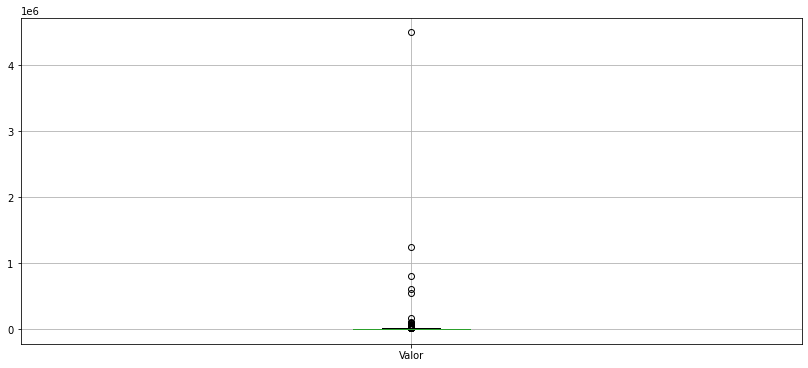

In [3]:
dados.boxplot(['Valor'])

Os outliers:
<img src="Compressed_box-plot.png" width=70%>

In [4]:
valor = dados['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [5]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

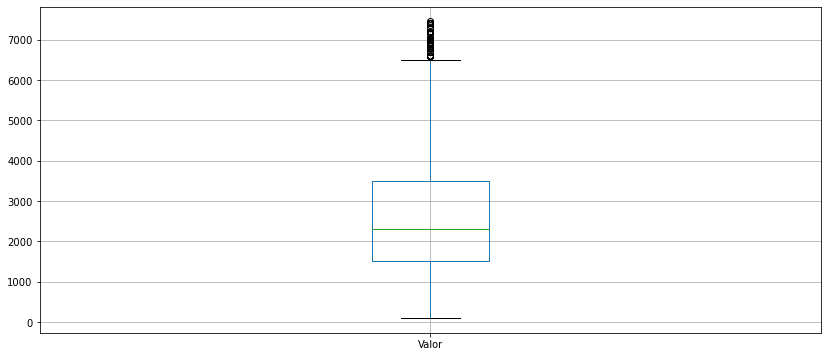

In [6]:
dados_new.boxplot(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

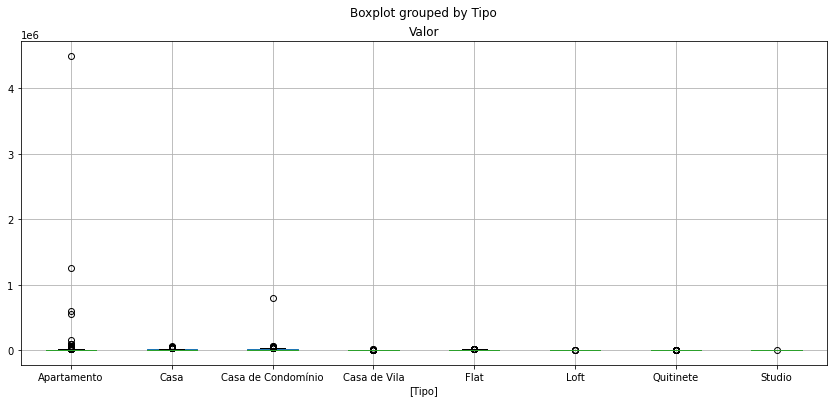

In [7]:
dados.boxplot(['Valor'], by=['Tipo'])

In [8]:
grupo_tipo = dados.groupby('Tipo')['Valor']
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q1 + 1.5 * IIQ

In [9]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Casa
Casa de Condomínio
Casa de Vila
Flat
Loft
Quitinete
Studio


In [13]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    selecao = (dados['Tipo'] == tipo) & (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [14]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22346,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento
22353,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
4681,Studio,Gamboa,0,0,0,110,1500.0,0.0,50.0,13.64,Apartamento
5544,Studio,Santa Teresa,1,1,0,25,1600.0,600.0,90.0,64.00,Apartamento


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

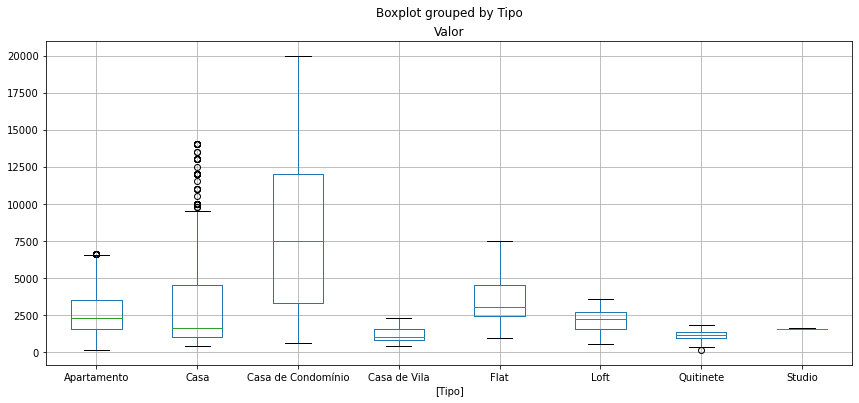

In [15]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [16]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep=";", index=False)